### Рассчёт межмодового расстояния для лазера ОКГ-13

In [22]:
from scipy.constants import c, pi

L = 22.5e-2  # в метрах

print(f'c/(2*L) = {c/(2*L):.4g} Гц')

c/(2*L) = 6.662e+08 Гц


### Рассчёт ширины линии в спектре лазера

Измерили ширину отдельного пика на полувысоте (производилось при масштабе рисунка 200%)

![Спектр ОКГ-13](images/1.PNG)

In [2]:
Delta_nu = 0.95 * 6.66e8 / 14.3
delta_Delta_nu = (0.15*14.3 + 0.3*0.95)/14.3**2 * 6.66e8  # Гц

print(f'Delta nu = {Delta_nu:.3g} +- {delta_Delta_nu:.2g} Гц')

Delta nu = 4.42e+07 +- 7.9e+06 Гц


### Зависимость высот пиков в середине от высоты пиков сбоку

Видно, что зависимость близка к $I_p/\mathsf{max}(I_p) + I_s/\mathsf{max}(I_s) = \mathsf{const}$.

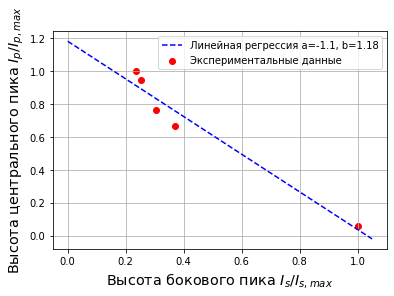

In [24]:
import numpy as np
import matplotlib.pyplot as plt

h_side = np.array([83/23*0.2, 32/24*0.2, 22/24*0.2, 105/24*0.05, 85/25*0.05])
h_center = np.array([1/23*0.2, 12/24*0.2, 17/24*0.2, 55/24*0.05, 75/25*0.05])

a, b = np.polyfit(h_side/h_side.max(), h_center/h_center.max(), 1)
plt.plot(np.linspace(0,1.05), a*np.linspace(0,1.05)+b, 'b--', label=f'Линейная регрессия a={a:.2}, b={b:.3}')

plt.scatter(h_side/h_side.max(), h_center/h_center.max(), color='r', label='Экспериментальные данные')

plt.xlabel(r"Высота бокового пика $I_s/I_{s,max}$", fontsize='x-large')
plt.ylabel(r"Высота центрального пика $I_p/I_{p,max}$", fontsize='x-large')

plt.grid()
plt.legend()

plt.savefig('images/I-p-vs-I-s.png', dpi=300)

### Определение ширин линий p и s и последующее определение коэффициентов отражения

In [4]:
111/1.541*0.618  # Какова ширина одного деления вдоль x в МГц

44.51524983776769

In [5]:
Delta_nu_1 = 12/24*44.5*1e6  # ортогональные
R_1 = np.exp(-2/3*Delta_nu_1*pi*L/c)

print(f'Delta_nu_1 = {Delta_nu_1:.3g} Гц, R_1 = {R_1:.3g}')

Delta_nu_1 = 2.22e+07 Гц, R_1 = 0.966


In [6]:
Delta_nu_2 = 18/23*44.5*1e6  # параллельные плоскости трехзеркального резонатора
R_2 = np.exp(-2/3*Delta_nu_2*pi*L/c)

print(f'Delta_nu_2 = {Delta_nu_2:.3g} Гц, R_2 = {R_2:.3g}')

Delta_nu_2 = 3.48e+07 Гц, R_2 = 0.947


### Определение коэффициента пропускания из данные измерения светотока

In [20]:
T_1 = (12/100*50*0.01)/(48/100*30/0.04)

print(f'T_1 = {T_1:.3g}')

T_1 = 0.000167


In [21]:
alpha_1 = np.sqrt(1 - R_1 - T_1)

print(f'alpha_1 = {alpha_1:.3g}')

alpha_1 = 0.185
